# Principal Component Analysis(PCA)

In [ ]:
PCA : --> It is used for Dimensionality Reduction
      -->It is used when we want to reduce no.of features.

Curse of Dimensionality : As we goon increase the no.of attributes up to certain level the performance of model increases. 
                    But after that if we feature increase the no.of attributes in model then the performance start decreasing.
                       
      -->To deal that problem we have Dimensionality Reduction.It is done by with the help of PCA

In [2]:
from sklearn.datasets import load_digits
import warnings
warnings.filterwarnings('ignore')

In [3]:
import pandas as pd
import numpy as np



In [4]:
data = load_digits()

In [5]:
print(data.DESCR)

.. _digits_dataset:

Optical recognition of handwritten digits dataset
--------------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 1797
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each blo

In [6]:
features = data.data   #independent var
target = data.target   # dep var

features.shape,target.shape

((1797, 64), (1797,))

In [7]:
target

array([0, 1, 2, ..., 8, 9, 8])

In [8]:
features

array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ..., 10.,  0.,  0.],
       [ 0.,  0.,  0., ..., 16.,  9.,  0.],
       ...,
       [ 0.,  0.,  1., ...,  6.,  0.,  0.],
       [ 0.,  0.,  2., ..., 12.,  0.,  0.],
       [ 0.,  0., 10., ..., 12.,  1.,  0.]])

In [9]:
type(features)

numpy.ndarray

In [11]:
features1=pd.DataFrame(features)
type(features1)

pandas.core.frame.DataFrame

In [14]:
features1.head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.85, random_state = 3)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1527, 64)
(270, 64)
(1527,)
(270,)


In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
my_model = LogisticRegression()

In [12]:
my_model.fit(X_train,y_train)

LogisticRegression()

In [13]:
preds = my_model.predict(X_test)

In [14]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [15]:
print(accuracy_score(y_test, preds))

0.9629629629629629


In [16]:
from sklearn.decomposition import PCA

Initially I have 64 dimensions. Now I want to bring it down to 4 dimensions

In [17]:
pca = PCA(n_components=18)

In [18]:
pca.fit(X_train)
# pca.fit(X_test)

PCA(n_components=18)

In [19]:
pc = pca.explained_variance_ratio_
pc

array([0.14966169, 0.13125052, 0.12005907, 0.08328038, 0.05787936,
       0.04946346, 0.04429116, 0.03664287, 0.03302922, 0.03081248,
       0.02409431, 0.02331202, 0.01848408, 0.01765525, 0.01454425,
       0.01400353, 0.01345908, 0.01225536])

In [20]:
pca.explained_variance_ratio_.shape

(18,)

In [21]:
np.sum(pca.explained_variance_ratio_)

0.8741780767371606

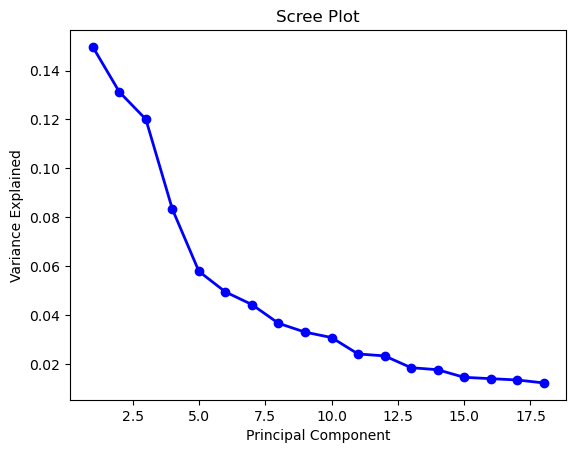

In [22]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components) + 1
plt.plot(PC_values, pc, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [23]:
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

In [24]:
pd.DataFrame(X_train_transformed)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,11.743724,10.705070,16.440582,-7.781768,15.601326,6.228776,1.029205,7.055312,10.733380,2.094563,2.286776,0.992286,-0.807051,10.260708,-1.075626,4.628135,1.730397,-1.659291
1,-2.444627,-8.734771,-18.243829,-22.496508,5.400862,-7.516093,0.955393,-6.064910,2.628962,8.790017,-5.092422,-0.062115,6.807376,4.099719,-2.768300,-1.622044,-2.038064,3.914093
2,-16.202833,-11.204825,-19.252713,-6.203501,0.249739,-1.638655,-0.465412,1.650686,4.085317,2.214147,-4.438953,-9.945263,1.044592,-1.914022,-2.211362,2.243420,6.455493,-9.635978
3,1.671929,-15.950816,-14.534990,-20.202461,6.111182,-5.818282,3.905966,-10.898985,11.468138,-3.924447,-0.501833,-9.844157,2.475962,4.474055,-3.780537,-4.350714,-3.218362,0.331003
4,-8.355784,-11.831017,-9.986818,1.303057,-11.731421,2.117579,-5.490047,-1.926648,-6.926516,-7.716930,9.801337,4.285849,-1.009675,-6.182833,-3.160629,-0.171491,7.422508,-4.817520
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1522,-15.659831,16.580737,12.806011,3.988221,-6.191595,19.773522,-2.108541,-2.054015,1.420661,4.877885,-1.128250,-3.179793,-0.321838,1.425488,-0.042179,-2.620190,3.200850,-2.554898
1523,3.643820,3.049332,18.409335,-13.527727,14.389427,3.199568,10.501605,1.418989,-0.305445,-3.162726,11.967368,9.481361,-2.469001,2.034207,-3.247569,5.140602,2.261362,5.822526
1524,2.492973,20.700132,-0.005811,9.722295,-8.055086,-10.516148,5.994699,3.846574,2.930077,-2.241219,-5.048824,1.874801,2.486600,-2.316360,1.388480,3.579662,1.199294,-1.353926
1525,20.694814,-10.161331,16.196264,3.069082,-13.919873,2.203224,0.356243,-6.758684,-3.695757,-5.097602,1.949126,-6.633805,5.396984,1.461236,-3.891331,-7.704477,1.737091,-2.574413


In [25]:
X_train_transformed.shape, X_test_transformed.shape

((1527, 18), (270, 18))

In [26]:
# pca.inverse_transform(X_train_transformed).shape

In [27]:
my_model.fit(X_train_transformed,y_train)

LogisticRegression()

In [28]:
preds = my_model.predict(X_test_transformed)

In [29]:
print(accuracy_score(y_test, preds))

0.9629629629629629
